In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [9]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [11]:
# check null value
null_values = data.isna().sum()
print(null_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


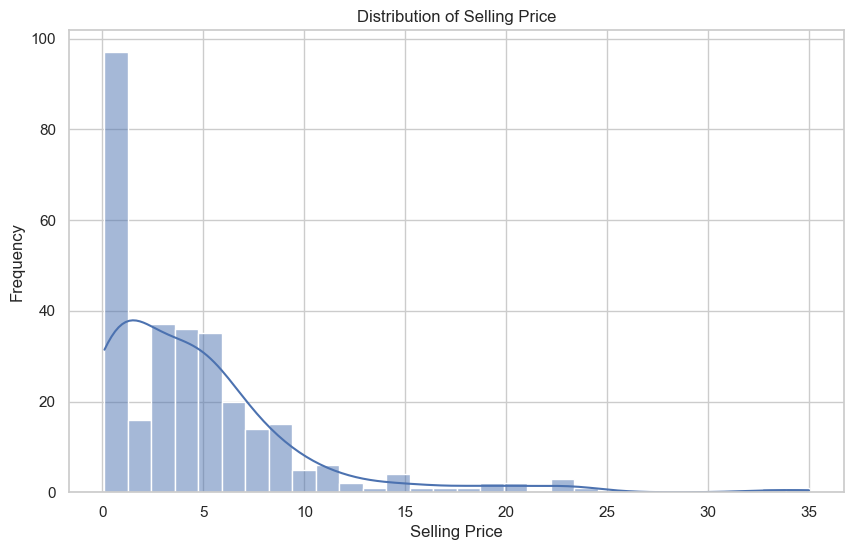

In [15]:
# Setting a style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

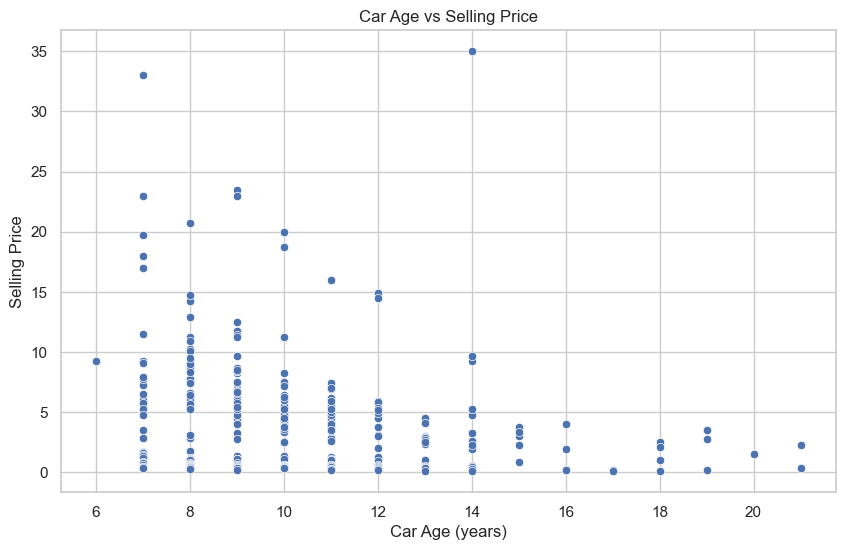

In [17]:
# 2. Car Age vs Selling Price
# Calculate car age from the 'Year' column
data['Car_Age'] = 2024 - data['Year']  # Assuming the current year is 2024

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=data)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

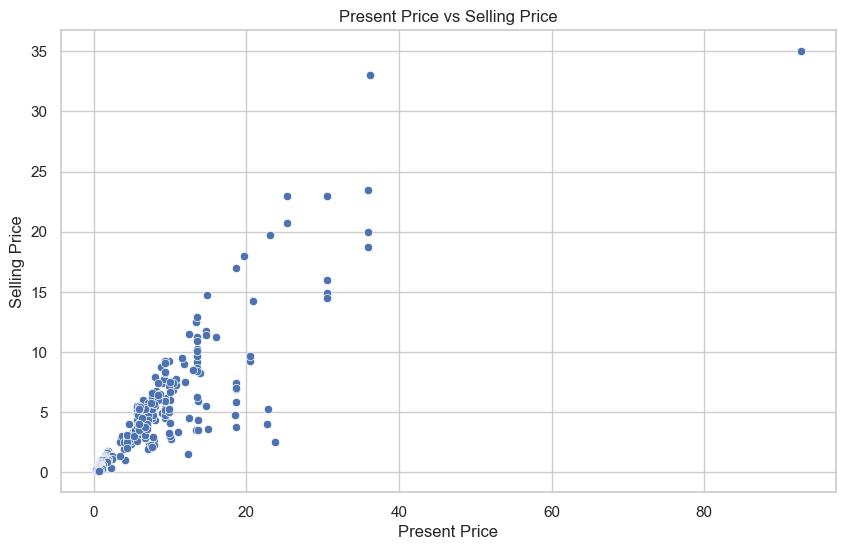

In [19]:
# 3. Present Price vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

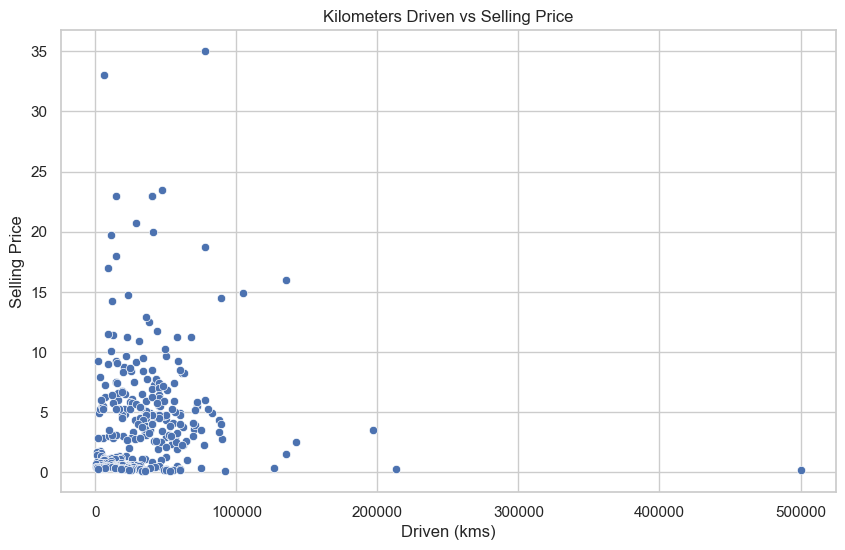

In [21]:
# 4. Driven_kms vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=data)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Driven (kms)')
plt.ylabel('Selling Price')
plt.show()

In [23]:
# Separate the features and target variable
X = data.drop(columns=['Selling_Price'])  # Features
y = data['Selling_Price']    

In [25]:
# Identify categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models to test
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
}


In [31]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)
    

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
 # Store results
results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
print(f"Results for {model_name}:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}\n")

Results for Random Forest:
Mean Absolute Error (MAE): 0.5952491803278687
Mean Squared Error (MSE): 0.7886295629508194
Root Mean Squared Error (RMSE): 0.8880481760303433
R^2 Score: 0.9657647253423859



In [37]:
data.shape

(301, 10)

In [39]:
data.duplicated().any()

True

In [53]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

numerical_df = data[numerical_columns]

corr_matrix = numerical_df.corr()

In [55]:
corr_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


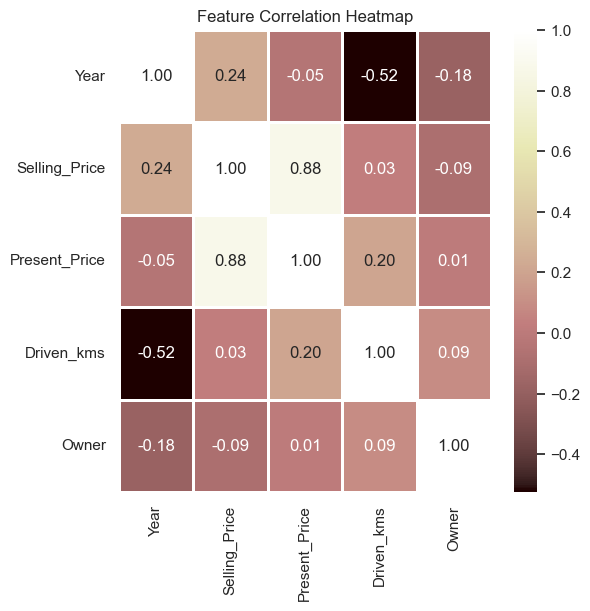

In [61]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='pink',  linewidths=1,fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [63]:
data['Car_Age'] = 2024 - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [65]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [69]:
data['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [71]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [75]:
ordinal_map = {'CNG':2,'Diesel':1,'Petrol':0}
data['Fuel_Type'] = data['Fuel_Type'].map(ordinal_map)
data['Fuel_Type'] = data['Fuel_Type'].astype('int64')

In [77]:
data = pd.get_dummies(data, columns = ['Selling_type','Transmission'])

In [79]:
data.dtypes

Car_Name                    object
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Fuel_Type                    int64
Owner                        int64
Car_Age                      int64
Selling_type_Dealer           bool
Selling_type_Individual       bool
Transmission_Automatic        bool
Transmission_Manual           bool
dtype: object

In [81]:
bool_columns = ['Selling_type_Dealer','Selling_type_Individual', 'Transmission_Automatic', 'Transmission_Manual']

data[bool_columns] = data[bool_columns].astype('int64')

In [83]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,10,1,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,11,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,7,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,13,1,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,10,1,0,0,1


In [85]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [87]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,10,1,0,0,1
1,2013,9.54,43000,1,0,11,1,0,0,1
2,2017,9.85,6900,0,0,7,1,0,0,1
3,2011,4.15,5200,0,0,13,1,0,0,1
4,2014,6.87,42450,1,0,10,1,0,0,1
